### `bisection method`

The bisection method is a simple root-finding algorithm that repeatedly halves an interval and selects the subinterval containing the root.

Root: 1.587890625


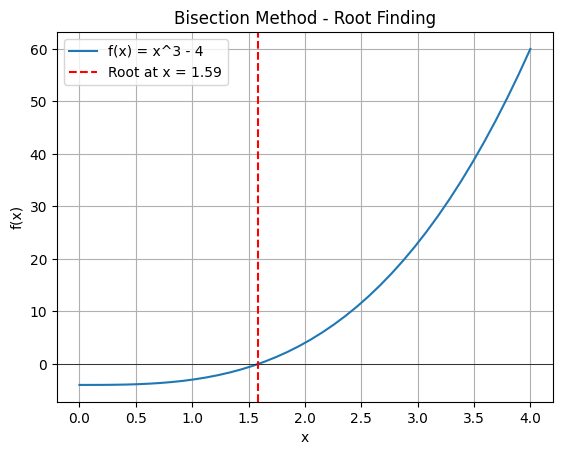

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
%matplotlib inline

def my_bisection(f, a, b, tol):
    """
    Approximates a root, R, of the function f bounded by a and b to within tolerance tol.
    
    Arguments:
    f -- Function whose root we are trying to find
    a -- Left boundary of the interval
    b -- Right boundary of the interval
    tol -- Tolerance value for stopping the iteration
    
    Returns:
    m -- Approximate root
    """
    # Check if a and b bound a root
    if np.sign(f(a)) == np.sign(f(b)):
        raise Exception("The scalars a and b do not bound a root")
    
    # Get midpoint
    m = (a + b) / 2
    
    # Stopping condition, report m as root if f(m) is within tolerance
    if np.abs(f(m)) < tol:
        return m
    elif np.sign(f(a)) == np.sign(f(m)):
        # Case where m is an improvement on a. Make recursive call with a = m
        return my_bisection(f, m, b, tol)
    elif np.sign(f(b)) == np.sign(f(m)):
        # Case where m is an improvement on b. Make recursive call with b = m
        return my_bisection(f, a, m, tol)

def f(x):
    return x**3 - 4

# Bisection method
root = my_bisection(f, 1, 3, 0.01)
print("Root:", root)

# Plotting the function and the root
x_vals = np.linspace(0, 4, 40)
y_vals = f(x_vals)

plt.plot(x_vals, y_vals, label="f(x) = x^3 - 4")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(root, color="r", linestyle='--', label=f"Root at x = {root:.2f}")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Bisection Method - Root Finding')
plt.legend()
plt.grid(True)
plt.show()

In [1]:
def func(x):
    return x**3 - 5 * x - 9

def bisection_method(func, a, b, tolerance):
    iteration = 1
    while True:
        midpoint = (a + b) / 2
        f_mid = func(midpoint)
        print(f"Iteration-{iteration}, x = {midpoint:.6f}, f(x) = {f_mid:.6f}")

        # Update the bracket
        if func(a) * f_mid < 0:
            b = midpoint
        else:
            a = midpoint

        # Check if the root is found within tolerance
        if abs(f_mid) <= tolerance:
            print(f"Required Root is: {midpoint:.8f}")
            return midpoint

        iteration += 1

def main():
    print("BISECTION METHOD IMPLEMENTATION")
    print()
    # Default values
    function_str = "x**3 - 5 * x - 9"
    a, b, tolerance = 2, 3, 0.0001

    print(f"f(x) = {function_str}")
    print(f"a = {a}, b = {b}, tolerance = {tolerance}")
    print()

    # Check if the guesses bracket the root
    if func(a) * func(b) >= 0:
        print("Error: The guesses do not bracket a root. Try again with different values.")
        return

    # Perform the bisection method
    bisection_method(func, a, b, tolerance)

if __name__ == "__main__":
    main()

BISECTION METHOD IMPLEMENTATION

f(x) = x**3 - 5 * x - 9
a = 2, b = 3, tolerance = 0.0001

Iteration-1, x = 2.500000, f(x) = -5.875000
Iteration-2, x = 2.750000, f(x) = -1.953125
Iteration-3, x = 2.875000, f(x) = 0.388672
Iteration-4, x = 2.812500, f(x) = -0.815186
Iteration-5, x = 2.843750, f(x) = -0.221588
Iteration-6, x = 2.859375, f(x) = 0.081448
Iteration-7, x = 2.851562, f(x) = -0.070592
Iteration-8, x = 2.855469, f(x) = 0.005297
Iteration-9, x = 2.853516, f(x) = -0.032680
Iteration-10, x = 2.854492, f(x) = -0.013700
Iteration-11, x = 2.854980, f(x) = -0.004204
Iteration-12, x = 2.855225, f(x) = 0.000546
Iteration-13, x = 2.855103, f(x) = -0.001829
Iteration-14, x = 2.855164, f(x) = -0.000641
Iteration-15, x = 2.855194, f(x) = -0.000048
Required Root is: 2.85519409


In [3]:
def secant_method(func, x0, x1, tolerance, max_iterations=100):
    """
    Finds a root of a function using the Secant Method.
    
    Parameters:
    func -- The function whose root we want to find
    x0, x1 -- Initial guesses
    tolerance -- Stopping tolerance
    max_iterations -- Maximum number of iterations (default: 100)
    
    Returns:
    The approximate root
    """
    print("\nSECANT METHOD IMPLEMENTATION")
    print(f"Initial guesses: x0 = {x0}, x1 = {x1}")
    print(f"Tolerance: {tolerance}\n")
    
    for i in range(max_iterations):
        fx0 = func(x0)
        fx1 = func(x1)
        
        if abs(fx1) < tolerance:
            print(f"\nConverged after {i} iterations")
            print(f"Root found: {x1:.8f}")
            return x1
            
        if abs(fx1 - fx0) < 1e-20:  # Prevent division by zero
            print("Warning: Denominator too small - stopping")
            return x1
            
        x_next = x1 - fx1 * (x1 - x0) / (fx1 - fx0)
        
        print(f"Iteration {i+1}: x = {x_next:.8f}, f(x) = {func(x_next):.8f}")
        
        x0, x1 = x1, x_next
    
    print(f"\nMaximum iterations ({max_iterations}) reached")
    print(f"Best approximation: {x1:.8f}")
    return x1

# Example usage:
def example_function(x):
    return x**3 - 5*x - 9

if __name__ == "__main__":
    # Initial guesses
    x0, x1 = 2, 3
    tolerance = 1e-6
    
    root = secant_method(example_function, x0, x1, tolerance)
    print(f"\nFinal root approximation: {root:.8f}")


SECANT METHOD IMPLEMENTATION
Initial guesses: x0 = 2, x1 = 3
Tolerance: 1e-06

Iteration 1: x = 2.78571429, f(x) = -1.31086006
Iteration 2: x = 2.85087497, f(x) = -0.08392251
Iteration 3: x = 2.85533196, f(x) = 0.00263492
Iteration 4: x = 2.85519628, f(x) = -0.00000502
Iteration 5: x = 2.85519654, f(x) = -0.00000000

Converged after 5 iterations
Root found: 2.85519654

Final root approximation: 2.85519654


In [4]:
def newton_raphson(func, func_derivative, x0, tolerance, max_iterations=100):
    """
    Finds a root of a function using the Newton-Raphson Method.
    
    Parameters:
    func -- The function whose root we want to find
    func_derivative -- The derivative of the function
    x0 -- Initial guess
    tolerance -- Stopping tolerance
    max_iterations -- Maximum number of iterations (default: 100)
    
    Returns:
    The approximate root
    """
    print("\nNEWTON-RAPHSON METHOD IMPLEMENTATION")
    print(f"Initial guess: x0 = {x0}")
    print(f"Tolerance: {tolerance}\n")
    
    for i in range(max_iterations):
        fx = func(x0)
        dfx = func_derivative(x0)
        
        if abs(fx) < tolerance:
            print(f"\nConverged after {i} iterations")
            print(f"Root found: {x0:.8f}")
            return x0
            
        if abs(dfx) < 1e-20:  # Prevent division by zero
            print("Warning: Derivative too small - stopping")
            return x0
            
        x_next = x0 - fx / dfx
        
        print(f"Iteration {i+1}: x = {x_next:.8f}, f(x) = {func(x_next):.8f}")
        
        if abs(x_next - x0) < tolerance:
            print(f"\nConverged after {i+1} iterations")
            print(f"Root found: {x_next:.8f}")
            return x_next
            
        x0 = x_next
    
    print(f"\nMaximum iterations ({max_iterations}) reached")
    print(f"Best approximation: {x0:.8f}")
    return x0

# Example function and its derivative
def example_function(x):
    return x**3 - 5*x - 9

def example_derivative(x):
    return 3*x**2 - 5

if __name__ == "__main__":
    # Initial guess
    x0 = 2.5
    tolerance = 1e-6
    
    root = newton_raphson(example_function, example_derivative, x0, tolerance)
    print(f"\nFinal root approximation: {root:.8f}")


NEWTON-RAPHSON METHOD IMPLEMENTATION
Initial guess: x0 = 2.5
Tolerance: 1e-06

Iteration 1: x = 2.92727273, f(x) = 1.44721863
Iteration 2: x = 2.85738166, f(x) = 0.04255568
Iteration 3: x = 2.85519864, f(x) = 0.00004084
Iteration 4: x = 2.85519654, f(x) = 0.00000000

Converged after 4 iterations
Root found: 2.85519654

Final root approximation: 2.85519654


Solution found: x = [ 1.4952723  -1.32821713]


C:\Users\mausa\AppData\Local\Temp\ipykernel_5404\2901126764.py:61: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X, Y, Z1, levels=[0], colors='b', label='f1(x, y) = 0')
C:\Users\mausa\AppData\Local\Temp\ipykernel_5404\2901126764.py:62: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X, Y, Z2, levels=[0], colors='r', label='f2(x, y) = 0')


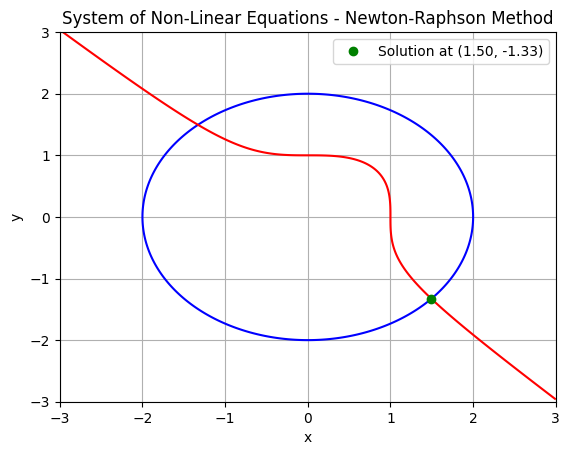

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Example system of non-linear equations
def f1(x):
    return x[0]**2 + x[1]**2 - 4

def f2(x):
    return x[0]**3 + x[1]**3 - 1

# Function vector
def f(x):
    return np.array([f1(x), f2(x)])

# Jacobian matrix with regularization to avoid singularity
def jacobian(f, x, alpha=1e-6):
    n = len(x)
    J = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            h = 1e-5
            x_perturbed = np.copy(x)
            x_perturbed[j] += h
            J[i, j] = (f(x_perturbed)[i] - f(x)[i]) / h
    J += alpha * np.eye(n)  # Add a small value to diagonal to regularize
    return J

# Newton's method for systems
def newton_system(f, x0, tol=1e-5, max_iter=100):
    iter_count = 0
    while np.linalg.norm(f(x0)) > tol and iter_count < max_iter:
        J = jacobian(f, x0)  # Compute Jacobian
        try:
            delta = np.linalg.solve(J, -f(x0))  # Solve for the update
        except np.linalg.LinAlgError:
            print("Jacobian is singular, cannot solve system.")
            return None
        x0 = x0 + delta  # Update the solution
        iter_count += 1
    if iter_count == max_iter:
        print("Maximum iterations reached without convergence.")
    return x0

# Initial guess
x0 = np.array([1.0, 1.0])

# Solve the system
root = newton_system(f, x0)

if root is not None:
    print(f"Solution found: x = {root}")

    # Plotting the root in 2D space
    x_vals = np.linspace(-3, 3, 400)
    y_vals = np.linspace(-3, 3, 400)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z1 = X**2 + Y**2 - 4
    Z2 = X**3 + Y**3 - 1

    # Plotting the system
    plt.contour(X, Y, Z1, levels=[0], colors='b', label='f1(x, y) = 0')
    plt.contour(X, Y, Z2, levels=[0], colors='r', label='f2(x, y) = 0')
    plt.plot(root[0], root[1], 'go', label=f'Solution at ({root[0]:.2f}, {root[1]:.2f})')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('System of Non-Linear Equations - Newton-Raphson Method')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("No solution found.")